# Data Visualization & Splitting

Now that we have ingested the data into `AI_Pipeline_V2/data/raw`, we need to:
1.  **Visualize** the class imbalance.
2.  **Split** the data into Train/Validation sets using Stratified Sampling (to keep the ratio of classes significantly equal).

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pathlib import Path

DATA_ROOT = Path("../data/raw")
OUTPUT_DIR = Path("../data/loaders")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

def get_file_list(root_dir):
    data = []
    for class_dir in os.listdir(root_dir):
        full_path = root_dir / class_dir
        if full_path.is_dir():
            files = [f for f in os.listdir(full_path) if f.lower().endswith(('.jpg', '.png'))]
            for f in files:
                data.append({
                    'filename': f,
                    'class': class_dir,
                    'path': str(full_path / f)
                })
    return pd.DataFrame(data)

# 1. Load DataFrames
df_type = get_file_list(DATA_ROOT / "type_classification")
df_severity = get_file_list(DATA_ROOT / "severity_dfu")

print(f"Wound Type Total: {len(df_type)}")
print(f"DFU Severity Total: {len(df_severity)}")

Wound Type Total: 24905
DFU Severity Total: 9639


## 1. Visualization: Wound Type Distribution

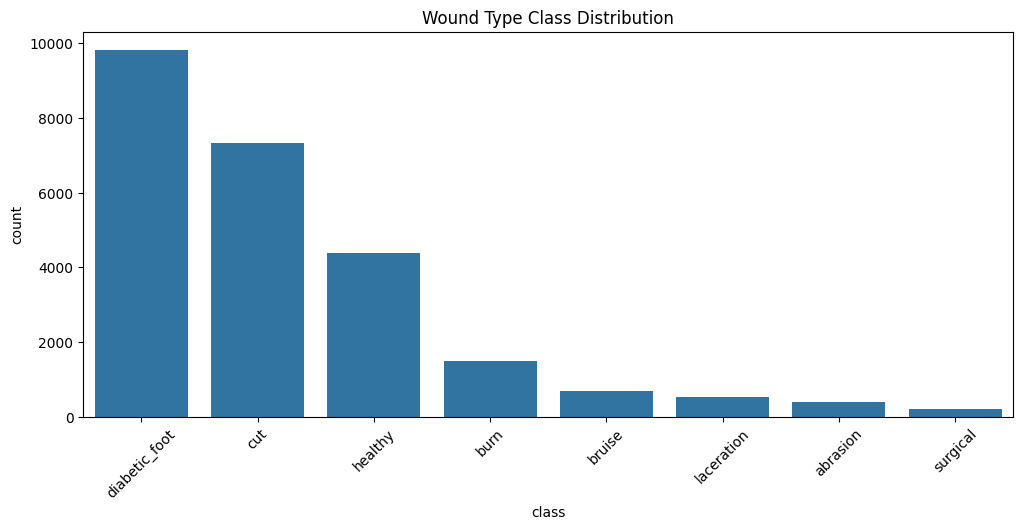

class
diabetic_foot    9812
cut              7343
healthy          4383
burn             1504
bruise            703
laceration        544
abrasion          404
surgical          212
Name: count, dtype: int64

In [14]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df_type, x='class', order=df_type['class'].value_counts().index)
plt.title("Wound Type Class Distribution")
plt.xticks(rotation=45)
plt.show()

df_type['class'].value_counts()

## 2. Visualization: DFU Severity

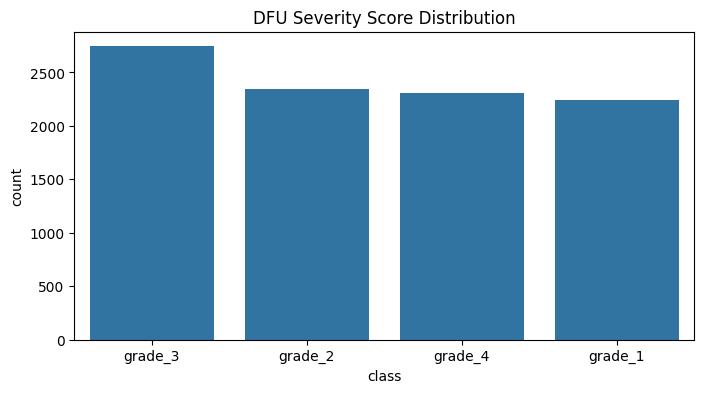

class
grade_3    2744
grade_2    2345
grade_4    2310
grade_1    2240
Name: count, dtype: int64

In [15]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_severity, x='class', order=df_severity['class'].value_counts().index)
plt.title("DFU Severity Score Distribution")
plt.show()

df_severity['class'].value_counts()

## 3. Stratified Splitting
We will save `train.csv` and `val.csv` for each task.

In [16]:
def save_splits(df, task_name):
    if df.empty:
        print(f"Skipping {task_name} (Empty)")
        return
        
    train_df, val_df = train_test_split(
        df, 
        test_size=0.2, 
        stratify=df['class'], 
        random_state=42
    )
    
    # Save
    train_path = OUTPUT_DIR / f"{task_name}_train.csv"
    val_path = OUTPUT_DIR / f"{task_name}_val.csv"
    
    train_df.to_csv(train_path, index=False)
    val_df.to_csv(val_path, index=False)
    
    print(f"Saved {task_name} Splits:")
    print(f"  Train: {len(train_df)}")
    print(f"  Val:   {len(val_df)}")

save_splits(df_type, "wound_type")
save_splits(df_severity, "dfu_severity")

Saved wound_type Splits:
  Train: 19924
  Val:   4981
Saved dfu_severity Splits:
  Train: 7711
  Val:   1928
